# Customer Booking dataset by British Airways

## Exploratory Data Analysis

This notebook contains the EDA done on the customer booking dataset provided by British Airways

In [1]:
# imoprting libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use("dark_background")

In [2]:
# reading the dataset

df = pd.read_csv("data/customer_booking.csv", encoding = "ISO-8859-1")

In [3]:
# sanity check

df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
# checking the shape
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 50000 rows and 14 columns.


In [5]:
# checking the datatypes, missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [6]:
# how many bookings are complete
complete_booking = df['booking_complete'].sum()
incomplete_booking = len(df) - complete_booking

percent_complete = complete_booking / len(df) * 100
percent_incomplete = 100 - percent_complete

print(f"{complete_booking} bookings were complete and {incomplete_booking} bookings were left incomplete.")
print(f"{percent_complete:.2f}% bookings were complete and {percent_incomplete:.2f}% bookings were left incomplete.")

7478 bookings were complete and 42522 bookings were left incomplete.
14.96% bookings were complete and 85.04% bookings were left incomplete.


This is an imbalance dataset and will cause some issues when applying a predictive model.

In [7]:
df['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

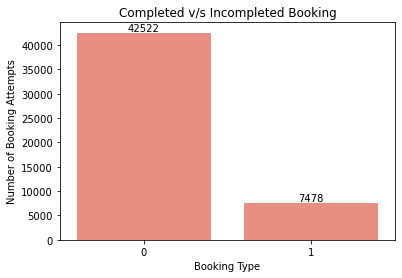

In [8]:
plt.figure()
ax = sns.barplot(x = df['booking_complete'].value_counts().index,
                 y = df['booking_complete'].value_counts().values,
                 color = 'salmon')
plt.bar_label(ax.containers[0])
plt.title("Completed v/s Incompleted Booking")
plt.xlabel("Booking Type")
plt.ylabel("Number of Booking Attempts")
plt.show()

In [9]:
df['sales_channel'].value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

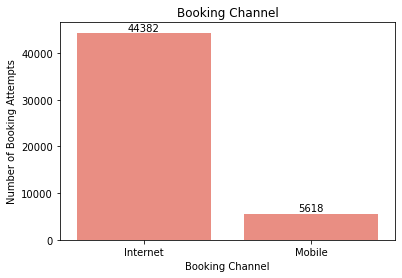

In [10]:
plt.figure()
ax = sns.barplot(x = df['sales_channel'].value_counts().index,
                 y = df['sales_channel'].value_counts().values,
                 color = 'salmon')
plt.bar_label(ax.containers[0])
plt.title("Booking Channel")
plt.xlabel("Booking Channel")
plt.ylabel("Number of Booking Attempts")
plt.show()

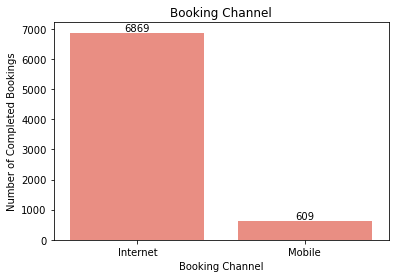

In [11]:
plt.figure()
ax = sns.barplot(x = df['sales_channel'].value_counts().index,
                 y = df[df['booking_complete'] == 1]['sales_channel'].value_counts().values,
                 color = 'salmon')
plt.bar_label(ax.containers[0])
plt.title("Booking Channel")
plt.xlabel("Booking Channel")
plt.ylabel("Number of Completed Bookings")
plt.show()

In [12]:
df['trip_type'].value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

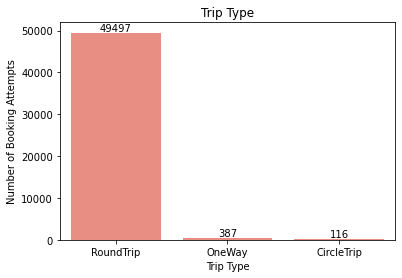

In [13]:
plt.figure()
ax = sns.barplot(x = df['trip_type'].value_counts().index,
                 y = df['trip_type'].value_counts().values,
                 color = 'salmon')
plt.bar_label(ax.containers[0])
plt.title("Trip Type")
plt.xlabel("Trip Type")
plt.ylabel("Number of Booking Attempts")
plt.show()

In [14]:
df['flight_day'].value_counts()

Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64

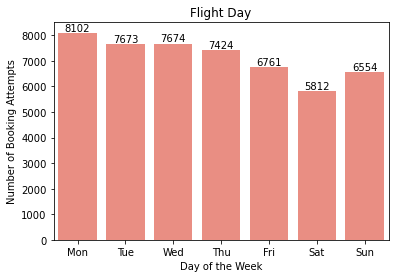

In [15]:
plt.figure()
ax = sns.barplot(x = df['flight_day'].value_counts().index,
                 y = df['flight_day'].value_counts().values,
                 order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
                 color = 'salmon')
plt.bar_label(ax.containers[0])
plt.title("Flight Day")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Booking Attempts")
plt.show()

We will map the flight day with a number of a week.

In [16]:
mapping = {
    "Mon" : 1,
    "Tue" : 2,
    "Wed" : 3,
    "Thu" : 4,
    "Fri" : 5,
    "Sat" : 6,
    "Sun" : 7
}

df['flight_day'] = df['flight_day'].map(mapping)

In [17]:
df['flight_day'].value_counts()

1    8102
3    7674
2    7673
4    7424
5    6761
7    6554
6    5812
Name: flight_day, dtype: int64

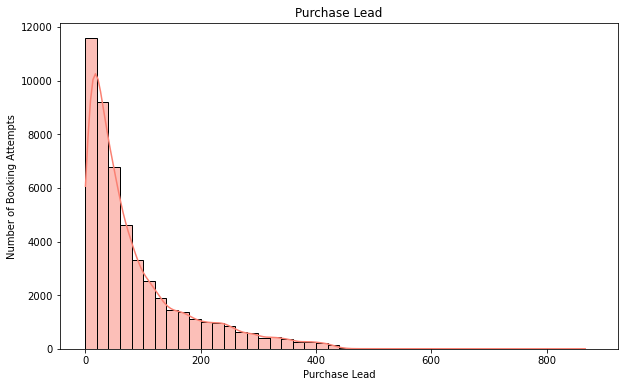

In [18]:
plt.figure(figsize = (10,6))
sns.histplot(x = df['purchase_lead'],
             binwidth = 20,
             kde = True,
             color = 'salmon')
plt.title("Purchase Lead")
plt.xlabel("Purchase Lead")
plt.ylabel("Number of Booking Attempts")
plt.show()

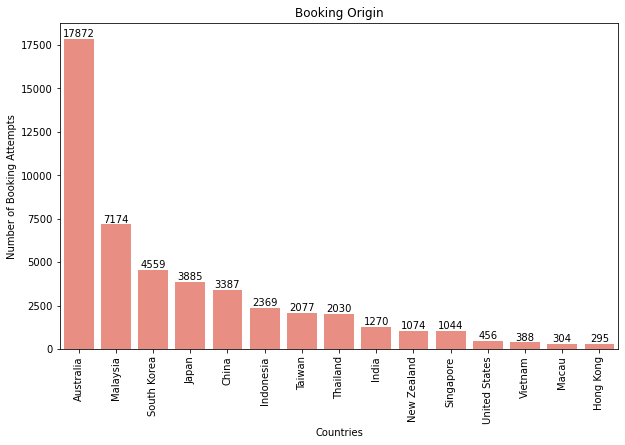

In [19]:
plt.figure(figsize = (10,6))
ax = sns.barplot(x = df['booking_origin'].value_counts()[:15].index,
                 y = df['booking_origin'].value_counts()[:15].values,
                 color = 'salmon')
plt.bar_label(ax.containers[0])
plt.title("Booking Origin")
plt.xlabel("Countries")
plt.xticks(rotation = 90)
plt.ylabel("Number of Booking Attempts")
plt.show()

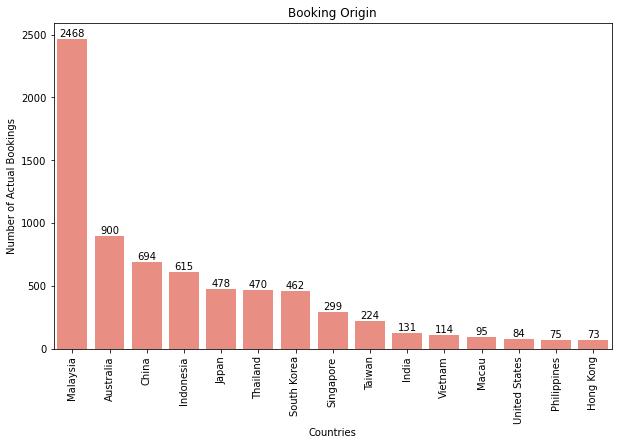

In [20]:
plt.figure(figsize = (10,6))
ax = sns.barplot(x = df[df['booking_complete'] == 1]['booking_origin'].value_counts()[:15].index,
                 y = df[df['booking_complete'] == 1]['booking_origin'].value_counts()[:15].values,
                 color = 'salmon')
plt.bar_label(ax.containers[0])
plt.title("Booking Origin")
plt.xlabel("Countries")
plt.xticks(rotation = 90)
plt.ylabel("Number of Actual Bookings")
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

## Predictive Modelling

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
model_df = df

In [24]:
# instantiate
ohe = OneHotEncoder()
sales_channels = pd.DataFrame(df['sales_channel'])
trip_type = pd.DataFrame(df['trip_type'])
# route = pd.DataFrame(df['route'])
# booking_origin = pd.DataFrame(df['booking_origin'])

# fit-transform-condense-put into a dataframe - sales_channel
encoded = ohe.fit_transform(sales_channels)
encoded_dense = encoded.toarray()
sales_channels_encoded_df = pd.DataFrame(encoded_dense, columns=['Internet','Mobile'], dtype=int)

# fit-transform-condense-put into a dataframe - trip_type
encoded = ohe.fit_transform(trip_type)
encoded_dense = encoded.toarray()
trip_type_encoded_df = pd.DataFrame(encoded_dense, columns=['RoundTrip','OneWayTrip','CircleTrip'], dtype=int)

# fit-transform-condense-put into a dataframe - route
# encoded = ohe.fit_transform(route)
# encoded_dense = encoded.toarray()
# route_encoded_df = pd.DataFrame(encoded_dense, columns=ohe.categories_, dtype=int)

# fit-transform-condense-put into a dataframe - booking_origin
# encoded = ohe.fit_transform(booking_origin)
# encoded_dense = encoded.toarray()
# booking_origin_encoded_df = pd.DataFrame(encoded_dense, columns=ohe.categories_, dtype=int)

# join with original dataframe
model_df = model_df.join(sales_channels_encoded_df)
model_df = model_df.join(trip_type_encoded_df)
# model_df = model_df.join(route_encoded_df)
# model_df = model_df.join(booking_origin_encoded_df)

In [25]:
model_df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Internet,Mobile,RoundTrip,OneWayTrip,CircleTrip
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1,0,0,0,1
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1,0,0,0,1
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,1,0,0,0,1
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1,0,0,0,1
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,1,0,0,0,1


In [26]:
# Defining independent and dependent variables
X = model_df.drop(['sales_channel', 'trip_type','booking_origin', 'route', 'booking_complete', 'Mobile'], axis=1)
y = model_df['booking_complete']

In [27]:
# sanity check
X.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,RoundTrip,OneWayTrip,CircleTrip
0,2,262,19,7,6,1,0,0,5.52,1,0,0,1
1,1,112,20,3,6,0,0,0,5.52,1,0,0,1
2,2,243,22,17,3,1,1,0,5.52,1,0,0,1
3,1,96,31,4,6,0,0,1,5.52,1,0,0,1
4,2,68,22,15,3,1,0,1,5.52,1,0,0,1


In [28]:
# sanity check
y.head()

0    0
1    0
2    0
3    0
4    0
Name: booking_complete, dtype: int64

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   purchase_lead          50000 non-null  int64  
 2   length_of_stay         50000 non-null  int64  
 3   flight_hour            50000 non-null  int64  
 4   flight_day             50000 non-null  int64  
 5   wants_extra_baggage    50000 non-null  int64  
 6   wants_preferred_seat   50000 non-null  int64  
 7   wants_in_flight_meals  50000 non-null  int64  
 8   flight_duration        50000 non-null  float64
 9   Internet               50000 non-null  int32  
 10  RoundTrip              50000 non-null  int32  
 11  OneWayTrip             50000 non-null  int32  
 12  CircleTrip             50000 non-null  int32  
dtypes: float64(1), int32(4), int64(8)
memory usage: 4.2 MB


## Train-Test split

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [31]:
# checking the shape of splits
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (40000, 13)
X_test shape: (10000, 13)
y_train shape: (40000,)
y_test shape: (10000,)


## Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

# instantiate
scaler = StandardScaler()

# fit
scaler.fit(X_train)

# transform
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Correlation matrix

<AxesSubplot:>

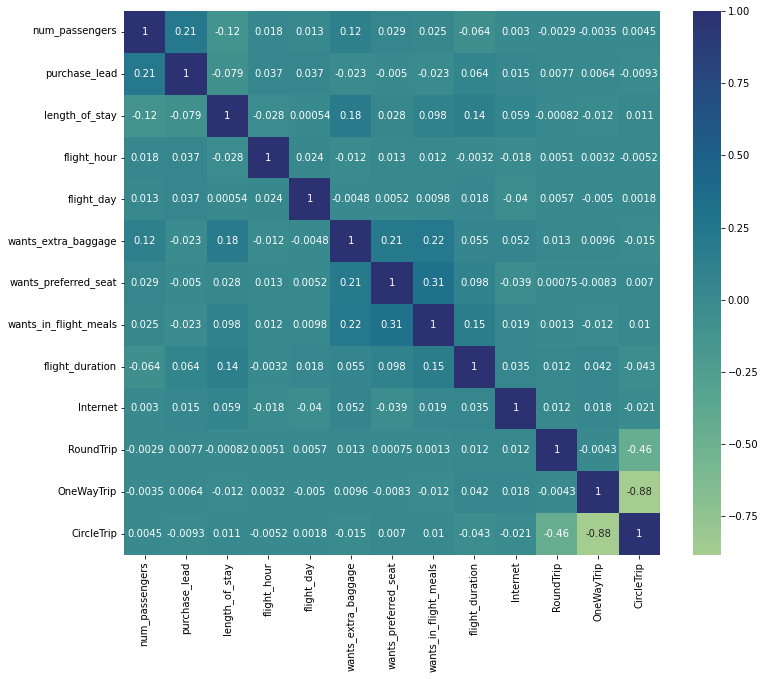

In [33]:
corr = X_train.corr()

plt.figure(figsize=(12,10))

#plot the heatmap
sns.heatmap(corr, cmap='crest', annot=True)

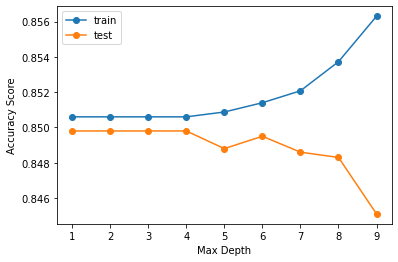

In [34]:
from sklearn.tree import DecisionTreeClassifier

train_accs = []
test_accs = []
y_pred = []

for depth in range(1, 10):

    # 1. Instantiate 
    my_tree = DecisionTreeClassifier(max_depth=depth)

    # 2. Fit (on the train set)
    my_tree.fit(X_train, y_train)
    
    y_prediction = my_tree.predict(X_test)

    # 3. Score (on both sets)
    train_score = my_tree.score(X_train, y_train)
    test_score = my_tree.score(X_test, y_test)
    
    # Add these to the lists
    train_accs.append(train_score)
    test_accs.append(test_score)
    y_pred.append(y_prediction)
    
# Visualize
plt.figure()
plt.plot(range(1, 10), train_accs, label='train', marker='o')
plt.plot(range(1, 10), test_accs, label='test', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [35]:
# so keeping max_depth as 4
# 1. Instantiate 
my_tree = DecisionTreeClassifier(max_depth=5)

# 2. Fit (on the train set)
my_tree.fit(X_train, y_train)

y_pred = my_tree.predict(X_test)

In [36]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, recall_score, precision_score, f1_score

In [37]:
cm = confusion_matrix(y_test, y_pred)

In [38]:
conmat = pd.DataFrame(
    data = cm,
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1']
)
display(conmat)

print(f'Recall score: {recall_score(y_test, y_pred)*100:0.1f}%')
print(f'Precision score: {precision_score(y_test, y_pred)*100:0.1f}%')
print(f'F1 score: {f1_score(y_test, y_pred)*100:0.1f}%')

,predicted 0,predicted 1
true 0,8482,16
true 1,1496,6


Recall score: 0.4%
Precision score: 27.3%
F1 score: 0.8%


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


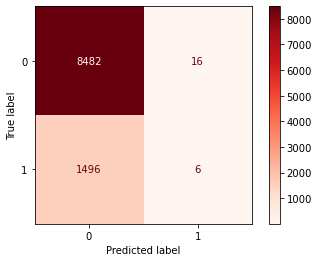

In [39]:
plot_confusion_matrix(my_tree, X_test, y_test, cmap='Reds');

Text(0.5, 0, 'Random Forest Feature Importance')

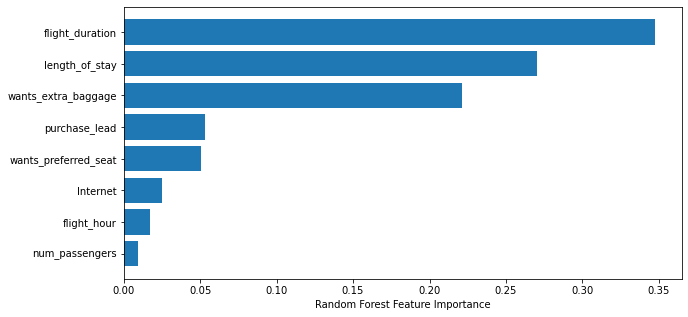

In [40]:
plt.figure(figsize=(10,5))
sorted_idx = my_tree.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx[-8:]], my_tree.feature_importances_[sorted_idx[-8:]])
plt.xlabel("Random Forest Feature Importance")

## Balancing Dataset

In [41]:
model_df['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [42]:
#create a dataframe having all labels 0 with 10000 samples
model_df_0 = model_df[model_df['booking_complete'] == 0].sample(n=8000)

In [43]:
model_df_0.shape

(8000, 19)

In [44]:
#concatenate the two dataframee, one havng all labels 0 and other having all labels as 1
model_df_new = pd.concat([model_df[model_df['booking_complete'] == 1], model_df_0], ignore_index=True)

In [45]:
model_df_new.shape

(15478, 19)

In [46]:
#shuffle the dataframe rows
model_df_new = model_df_new.sample(frac = 1).reset_index(drop=True)

In [47]:
model_df_new

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Internet,Mobile,RoundTrip,OneWayTrip,CircleTrip
0,1,Mobile,RoundTrip,94,4,11,7,HKTHND,Japan,1,1,0,7.57,0,0,1,0,0,1
1,4,Internet,RoundTrip,14,4,16,2,BKIICN,South Korea,0,0,0,6.62,0,1,0,0,0,1
2,3,Internet,RoundTrip,6,4,8,1,DPSICN,South Korea,0,0,0,6.62,0,1,0,0,0,1
3,1,Internet,RoundTrip,34,31,6,5,CMBMEL,Australia,1,1,1,8.83,0,1,0,0,0,1
4,2,Mobile,RoundTrip,127,6,19,7,DELHKG,India,1,0,0,5.52,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15473,2,Internet,RoundTrip,123,6,14,2,ICNMLE,South Korea,0,0,0,6.62,0,1,0,0,0,1
15474,2,Internet,RoundTrip,43,4,5,4,ICNPEN,South Korea,0,0,0,6.62,1,1,0,0,0,1
15475,2,Internet,RoundTrip,86,4,13,1,BKIHND,Malaysia,0,0,0,7.57,1,1,0,0,0,1
15476,5,Internet,RoundTrip,215,17,3,7,BKISYD,Malaysia,1,1,1,8.58,1,1,0,0,0,1


In [48]:
# Defining independent and dependent variables
X = model_df_new.drop(['sales_channel', 'trip_type','booking_origin', 'route', 'booking_complete', 'Mobile'], axis=1)
y = model_df_new['booking_complete']

In [49]:
# sanity check
X.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,RoundTrip,OneWayTrip,CircleTrip
0,1,94,4,11,7,1,1,0,7.57,0,0,0,1
1,4,14,4,16,2,0,0,0,6.62,1,0,0,1
2,3,6,4,8,1,0,0,0,6.62,1,0,0,1
3,1,34,31,6,5,1,1,1,8.83,1,0,0,1
4,2,127,6,19,7,1,0,0,5.52,0,0,0,1


In [50]:
# sanity check
y.head()

0    0
1    0
2    0
3    0
4    0
Name: booking_complete, dtype: int64

In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15478 entries, 0 to 15477
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         15478 non-null  int64  
 1   purchase_lead          15478 non-null  int64  
 2   length_of_stay         15478 non-null  int64  
 3   flight_hour            15478 non-null  int64  
 4   flight_day             15478 non-null  int64  
 5   wants_extra_baggage    15478 non-null  int64  
 6   wants_preferred_seat   15478 non-null  int64  
 7   wants_in_flight_meals  15478 non-null  int64  
 8   flight_duration        15478 non-null  float64
 9   Internet               15478 non-null  int32  
 10  RoundTrip              15478 non-null  int32  
 11  OneWayTrip             15478 non-null  int32  
 12  CircleTrip             15478 non-null  int32  
dtypes: float64(1), int32(4), int64(8)
memory usage: 1.3 MB


## Train-Test split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [53]:
# checking the shape of splits
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (12382, 13)
X_test shape: (3096, 13)
y_train shape: (12382,)
y_test shape: (3096,)


## Scaling

In [54]:
# instantiate
scaler = StandardScaler()

# fit
scaler.fit(X_train)

# transform
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Correlation matrix

<AxesSubplot:>

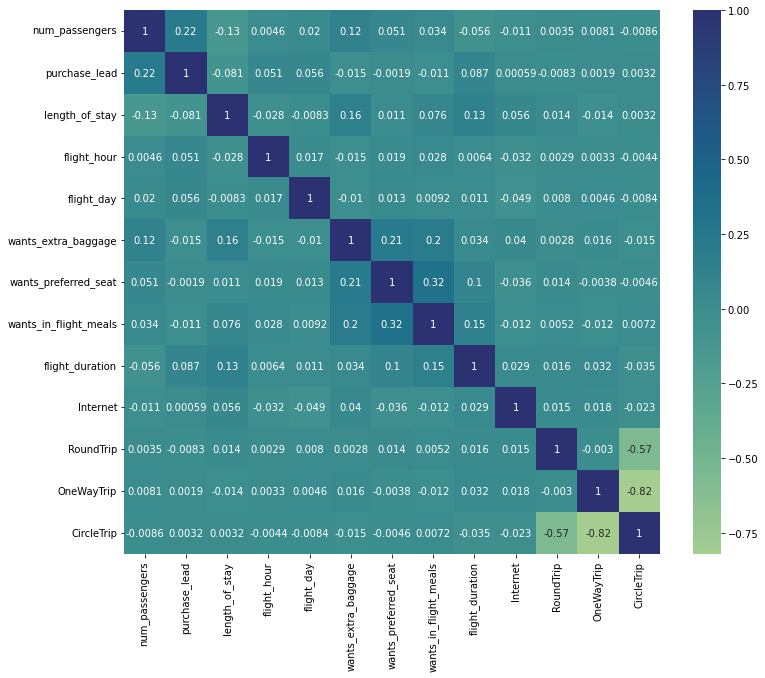

In [55]:
corr = X_train.corr()

plt.figure(figsize=(12,10))

#plot the heatmap
sns.heatmap(corr, cmap='crest', annot=True)

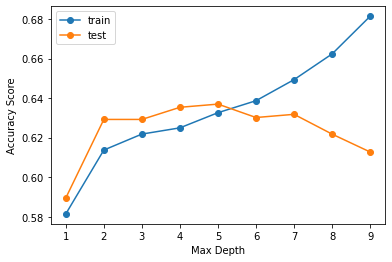

In [56]:
train_accs = []
test_accs = []
y_pred = []

for depth in range(1, 10):

    # 1. Instantiate 
    my_tree = DecisionTreeClassifier(max_depth=depth)

    # 2. Fit (on the train set)
    my_tree.fit(X_train, y_train)
    
    y_prediction = my_tree.predict(X_test)

    # 3. Score (on both sets)
    train_score = my_tree.score(X_train, y_train)
    test_score = my_tree.score(X_test, y_test)
    
    # Add these to the lists
    train_accs.append(train_score)
    test_accs.append(test_score)
    y_pred.append(y_prediction)
    
# Visualize
plt.figure()
plt.plot(range(1, 10), train_accs, label='train', marker='o')
plt.plot(range(1, 10), test_accs, label='test', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [63]:
# so keeping max_depth as 4
# 1. Instantiate 
my_tree = DecisionTreeClassifier(max_depth=6)

# 2. Fit (on the train set)
my_tree.fit(X_train, y_train)

y_pred = my_tree.predict(X_test)

In [64]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, recall_score, precision_score, f1_score

In [65]:
cm = confusion_matrix(y_test, y_pred)

In [66]:
conmat = pd.DataFrame(
    data = cm,
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1']
)
display(conmat)

print(f'Recall score: {recall_score(y_test, y_pred)*100:0.1f}%')
print(f'Precision score: {precision_score(y_test, y_pred)*100:0.1f}%')
print(f'F1 score: {f1_score(y_test, y_pred)*100:0.1f}%')

,predicted 0,predicted 1
true 0,1030,563
true 1,582,921


Recall score: 61.3%
Precision score: 62.1%
F1 score: 61.7%


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


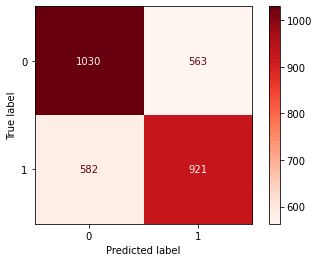

In [67]:
plot_confusion_matrix(my_tree, X_test, y_test, cmap='Reds');

Text(0.5, 0, 'Random Forest Feature Importance')

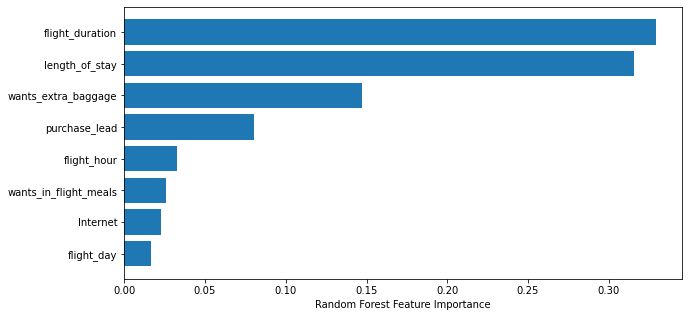

In [68]:
plt.figure(figsize=(10,5))
sorted_idx = my_tree.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx[-8:]], my_tree.feature_importances_[sorted_idx[-8:]])
plt.xlabel("Random Forest Feature Importance")

In [80]:
print(f"Training accuracy: {my_tree.score(X_train,y_train)*100:.2f}%")
print(f"Testing accuracy: {my_tree.score(X_test,y_test)*100:.2f}%")

Training accuracy: 63.87%
Testing accuracy: 63.02%
